In [1]:
import jax.numpy as jnp
import numpy as np
import time
import chex
import jax
import gymnasium as gym
import exciting_environments as excenv
from exciting_environments import GymWrapper
import random
import matplotlib.pyplot as plt
import diffrax

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [27]:
x = GymWrapper.fromName('Pendulum-v0',batch_size=5,l=[2,1,1,1,2])

In [28]:
x.step(jnp.array([1,1,1,1,1]).reshape(-1,1))

(Array([[-1.e+00,  5.e-05],
        [-1.e+00,  2.e-04],
        [-1.e+00,  2.e-04],
        [-1.e+00,  2.e-04],
        [-1.e+00,  5.e-05]], dtype=float32),
 Array([[1.1],
        [1.1],
        [1.1],
        [1.1],
        [1.1]], dtype=float32),
 Array([[False],
        [False],
        [False],
        [False],
        [False]], dtype=bool),
 Array([[False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False]], dtype=bool),
 {})

In [29]:
import time
import random
for batch_size in [10,100,1000,10000,100000]:
    w=GymWrapper.fromName('Pendulum-v0',batch_size=batch_size,l=[np.random.uniform(0,2) for _ in range(batch_size)])
    act=[w.env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(10000)]
    w.reset(random_key=jax.random.PRNGKey(9))
    start_t = time.time()
    for i in range(10000):
        #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
        obs,reward,a,b,_ = w.step(act[i])
    ex_time= time.time() -start_t
    print(f"Batch_Size:{batch_size} - diffrax Computation Time: {ex_time} \n")

Batch_Size:10 - diffrax Computation Time: 0.14713358879089355 

Batch_Size:100 - diffrax Computation Time: 0.1611464023590088 

Batch_Size:1000 - diffrax Computation Time: 0.24822568893432617 

Batch_Size:10000 - diffrax Computation Time: 1.444774866104126 

Batch_Size:100000 - diffrax Computation Time: 9.189547538757324 



In [31]:
import time
import random
batch_size=5
sim_len=10000
w1=GymWrapper.fromName('Pendulum-v0',batch_size=batch_size,solver=diffrax.Euler())
w2=GymWrapper.fromName('Pendulum-v0',batch_size=batch_size,solver=diffrax.Dopri5())
act=[w1.env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(sim_len)]
#act= np.zeros_like(act)
obs1_init,_=w1.reset(random_key=jax.random.PRNGKey(6))
obs2_init,_=w2.reset(random_key=jax.random.PRNGKey(6))
data_1=[]
data_2=[]
for i in range(sim_len):
    obs1,reward,a,b,_ = w1.step(act[i])
    obs2,reward,a,b,_ = w2.step(act[i])
    data_1.append(np.array(obs1)[1,0]*jnp.pi)
    data_2.append(np.array(obs2)[1,0]*jnp.pi)

In [33]:
obs1

Array([[ 0.19525856, -0.32328835],
       [-0.851779  ,  0.26121455],
       [ 0.10361518, -0.11213011],
       [-0.6189857 ,  0.6595929 ],
       [-0.21959695, -0.04905276]], dtype=float32)

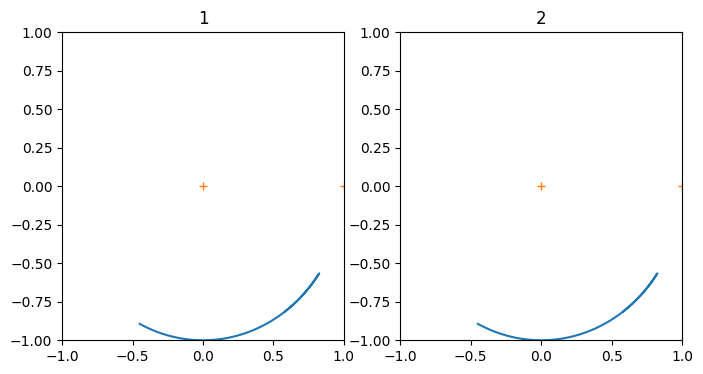

In [32]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(8,4))

axes[0].plot(np.sin(data_1),np.cos(data_1))
axes[1].plot(np.sin(data_2),np.cos(data_2))
axes[0].set_title("1")
axes[1].set_title("2")
axes[0].set_xlim(-1,1)
axes[0].set_ylim(-1,1)
axes[1].set_xlim(-1,1)
axes[1].set_ylim(-1,1)
axes[0].plot([0,0], marker='+', ls= 'none')
axes[1].plot([0,0], marker='+', ls= 'none')

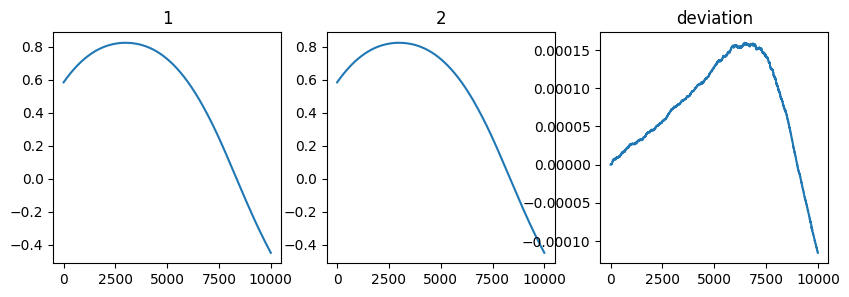

In [34]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

axes[0].plot(np.sin(data_1))
axes[1].plot(np.sin(data_2))
axes[0].set_title("1")
axes[1].set_title("2")
axes[2].set_title("deviation")
axes[2].plot(np.sin(data_1)-np.sin(data_2))